In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path = "/content/drive/MyDrive/bone+marrow+transplant+children.zip"

# Destination folder
extract_path = "/content/drive/MyDrive/bone+marrow"

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)


['bone-marrow.arff', 'bone-marrow.csv']

In [ ]:
from scipy.io import arff
import pandas as pd
import os

# Path to the extracted folder/content/drive/MyDrive/bone+marrow
extract_path = "/content/drive/MyDrive/bone+marrow"

# Find the ARFF file
arff_files = [file for file in os.listdir(extract_path) if file.endswith(".arff")]
if not arff_files:
    print("No ARFF files found.")
else:
    arff_file_path = os.path.join(extract_path, arff_files[0])

    # Load ARFF file
    data, meta = arff.loadarff(arff_file_path)

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Save as CSV
    csv_file_path = arff_file_path.replace(".arff", ".csv")
    df.to_csv(csv_file_path, index=False)

    print(f"Converted {arff_files[0]} to CSV: {csv_file_path}")


Converted bone-marrow.arff to CSV: /content/drive/MyDrive/bone+marrow/bone-marrow.csv


In [ ]:
df = pd.read_csv(csv_file_path)

In [ ]:
print("\n📊 Dataset Overview:")
print(df.info())


📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    object 
 1   Stemcellsource        187 non-null    object 
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    object 
 4   IIIV                  187 non-null    object 
 5   Gendermatch           187 non-null    object 
 6   DonorABO              187 non-null    object 
 7   RecipientABO          187 non-null    object 
 8   RecipientRh           187 non-null    object 
 9   ABOmatch              187 non-null    object 
 10  CMVstatus             187 non-null    object 
 11  DonorCMV              187 non-null    object 
 12  RecipientCMV          187 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    object 
 15  Tx

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number])

# Calculate kurtosis and skewness
kurtosis_values = numerical_cols.apply(kurtosis)
skewness_values = numerical_cols.apply(skew)

print("Kurtosis Values:\n", kurtosis_values)
print("\nSkewness Values:\n", skewness_values)


Kurtosis Values:
 Donorage                -0.624193
Recipientage            -1.176653
CD34kgx10d6              4.765998
CD3dCD34                      NaN
CD3dkgx10d8                   NaN
Rbodymass                     NaN
ANCrecovery             32.427473
PLTrecovery              6.100000
time_to_aGvHD_III_IV    -0.257964
survival_time           -0.492716
survival_status         -1.966667
dtype: float64

Skewness Values:
 Donorage                0.216449
Recipientage            0.070555
CD34kgx10d6             1.973628
CD3dCD34                     NaN
CD3dkgx10d8                  NaN
Rbodymass                    NaN
ANCrecovery             5.867493
PLTrecovery             2.846050
time_to_aGvHD_III_IV   -1.319862
survival_time           0.747217
survival_status         0.182574
dtype: float64


In [ ]:
print("\n📈 Statistical Summary:")
print(df.describe())


📈 Statistical Summary:
         Donorage  Recipientage  CD34kgx10d6    CD3dCD34  CD3dkgx10d8  \
count  187.000000    187.000000   187.000000  182.000000   182.000000   
mean    33.472068      9.931551    11.891781    5.385096     4.745714   
std      8.271826      5.305639     9.914386    9.598716     3.859128   
min     18.646575      0.600000     0.790000    0.204132     0.040000   
25%     27.039726      5.050000     5.350000    1.786683     1.687500   
50%     33.550685      9.600000     9.720000    2.734462     4.325000   
75%     40.117809     14.050000    15.415000    5.823565     6.785000   
max     55.553425     20.200000    57.780000   99.560970    20.020000   

        Rbodymass     ANCrecovery     PLTrecovery  time_to_aGvHD_III_IV  \
count  185.000000      187.000000      187.000000            187.000000   
mean    35.801081    26752.866310    90937.919786         775408.042781   
std     19.650922   161747.200525   288242.407688         418425.252689   
min      6.000000 

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Recipientgender,0
Stemcellsource,0
Donorage,0
Donorage35,0
IIIV,0
Gendermatch,0
DonorABO,0
RecipientABO,0
RecipientRh,0
ABOmatch,0


In [ ]:
# Fill missing values using dictionary-based inplace method
df.fillna({
    'CD34kgx10d6': df['CD34kgx10d6'].median(),
    'CD3dCD34': df['CD3dCD34'].median(),
    'CD3dkgx10d8': df['CD3dkgx10d8'].median(),
    'Rbodymass': df['Rbodymass'].median()
}, inplace=True)

print("Missing values filled correctly without warnings!")


Missing values filled correctly without warnings!


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical features encoded successfully!")


Categorical features encoded successfully!


<Figure size 1500x1200 with 0 Axes>

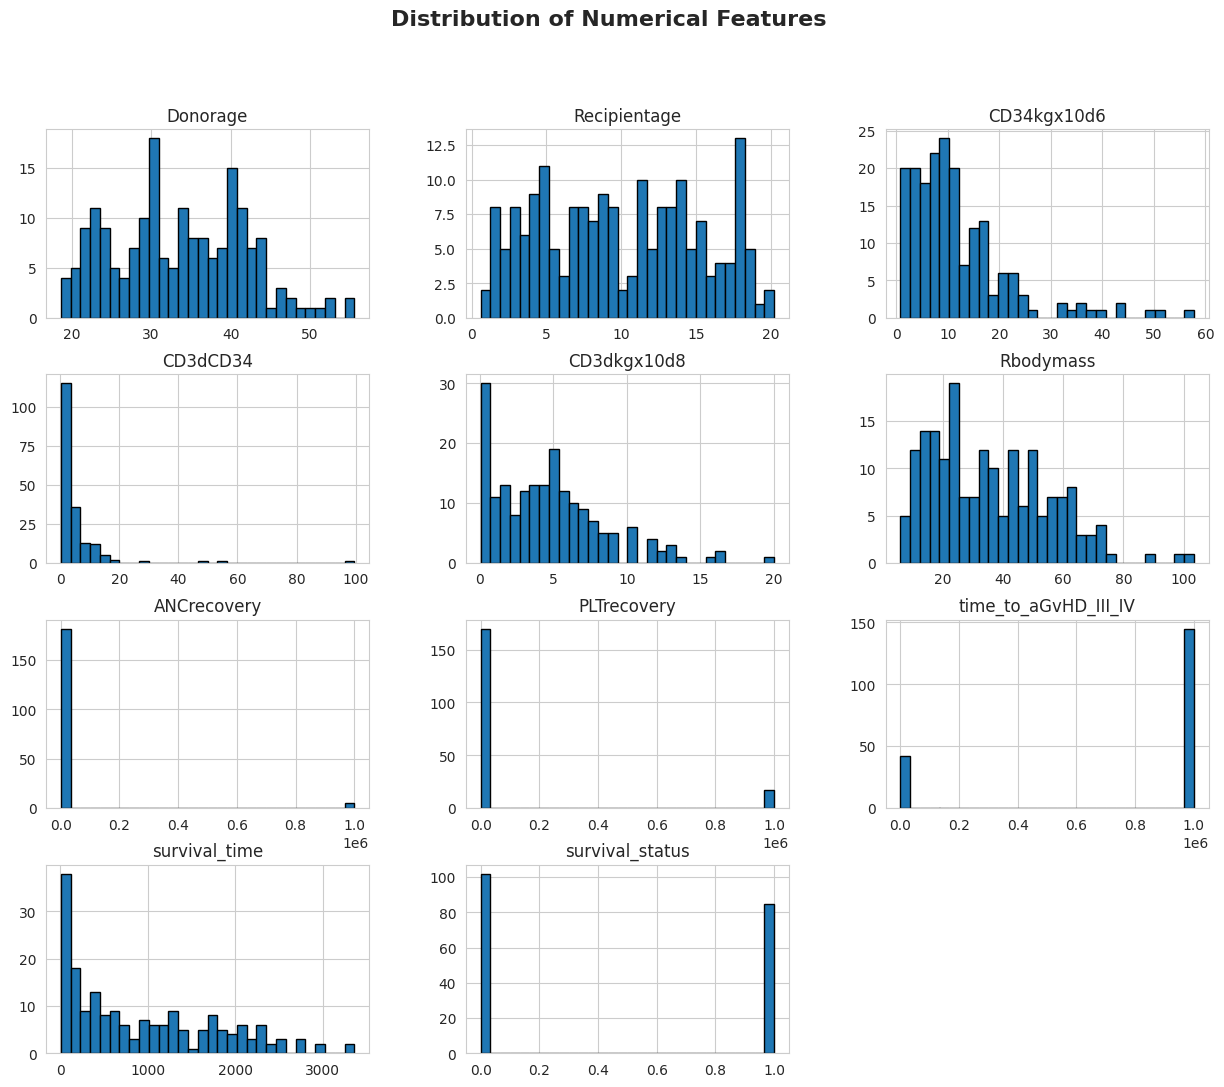

In [ ]:
# Histograms
plt.figure(figsize=(15, 12))
df.hist(bins=30, edgecolor='black', figsize=(15, 12))
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold')
plt.show()


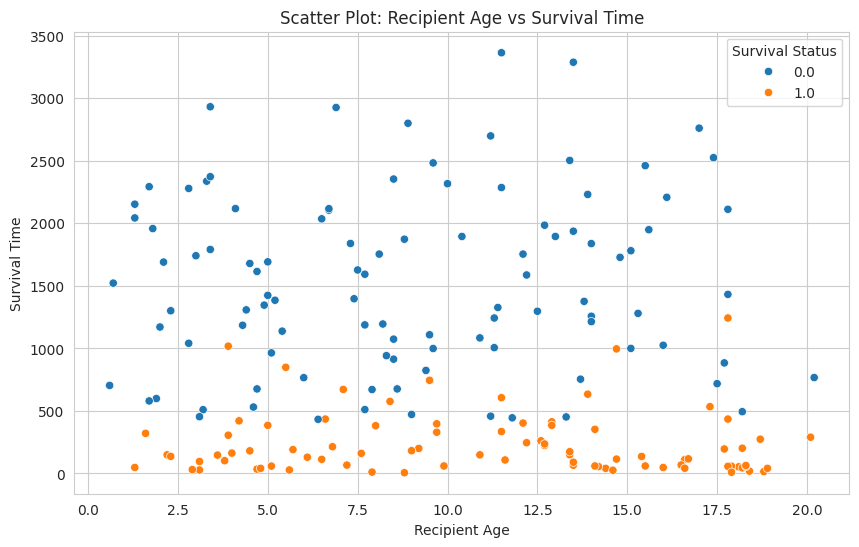

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Recipientage'], y=df['survival_time'], hue=df['survival_status'])
plt.title("Scatter Plot: Recipient Age vs Survival Time")
plt.xlabel("Recipient Age")
plt.ylabel("Survival Time")
plt.legend(title="Survival Status")
plt.show()


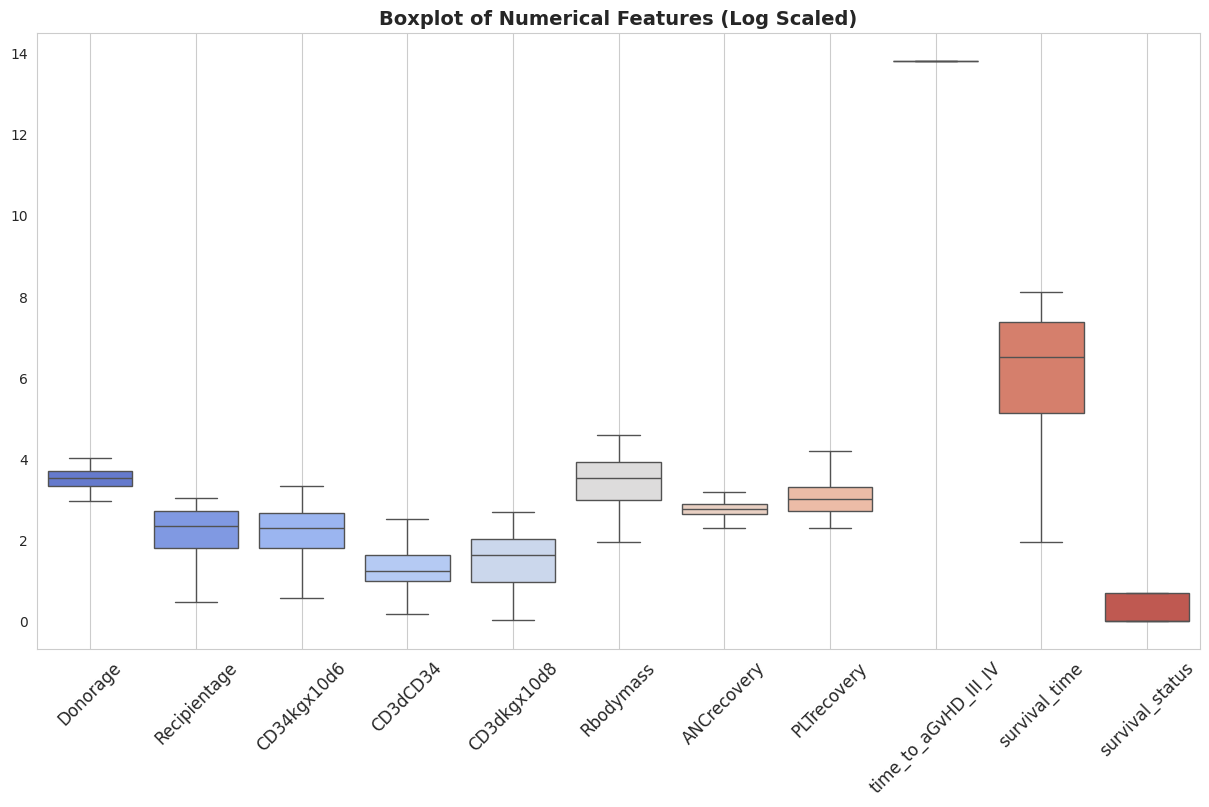

In [ ]:
# Apply log transformation to normalize scale
log_df = numeric_df.apply(lambda x: np.log1p(x))

plt.figure(figsize=(15, 8))
sns.boxplot(data=log_df, palette='coolwarm', whis=1.5, showfliers=True)
plt.xticks(rotation=45, fontsize=12)
plt.title("Boxplot of Numerical Features (Log Scaled)", fontsize=14, fontweight='bold')
plt.grid()
plt.show()


In [ ]:
# Standardize data for better visualization
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)


In [ ]:
df.describe()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,11.891781,5.314224,4.734465,35.771123,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,8.271826,5.305639,9.914386,9.478524,3.807513,19.547121,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,27.039726,5.050000,5.350000,1.809375,1.725000,19.250000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,33.550685,9.600000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,40.117809,14.050000,15.415000,5.771418,6.575000,50.300000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


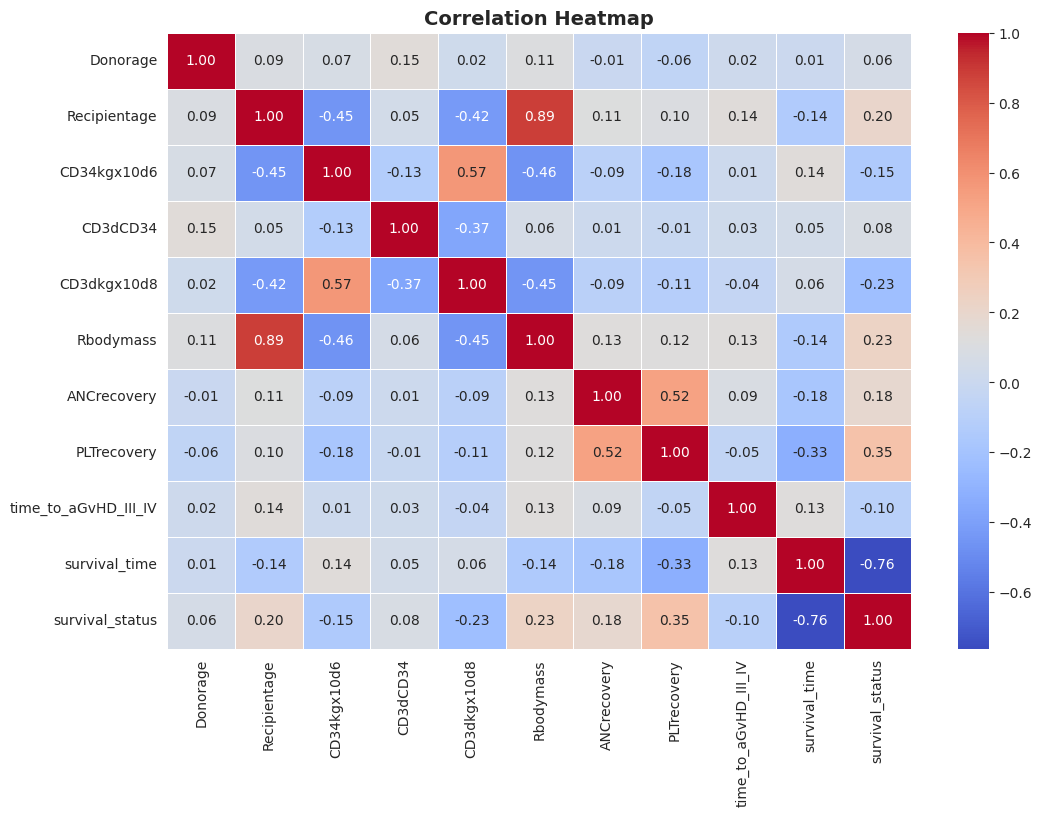

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Replace 'target_column' with the actual target column name, which is likely 'survival_status'
X = df.drop(columns=['survival_status'])  # Features (drop the target column)
y = df['survival_status']  # Target variable (0 = did not survive, 1 = survived)

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE # Import the SMOTE class from imblearn.over_sampling


In [ ]:
# Convert 'survival_status' to categorical if it's not already
y = y.astype(int)  # Assuming 'survival_status' should be 0 or 1

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_resampled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X.columns)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Random Forest Model Evaluation:
Accuracy: 0.9737
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



<ipython-input-152-690efa9f96e3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


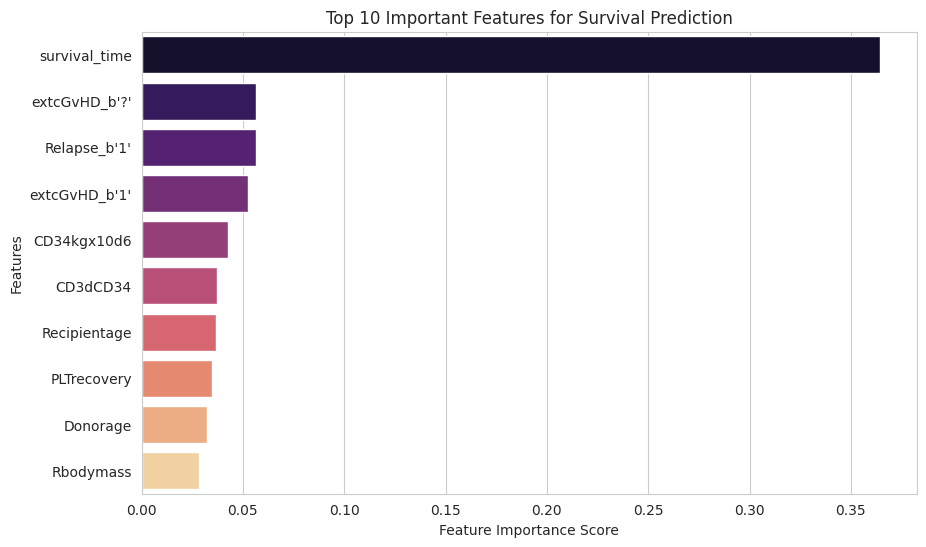

In [ ]:


# Get feature importances and plot (This should be in the same cell)
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title("Top 10 Important Features for Survival Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

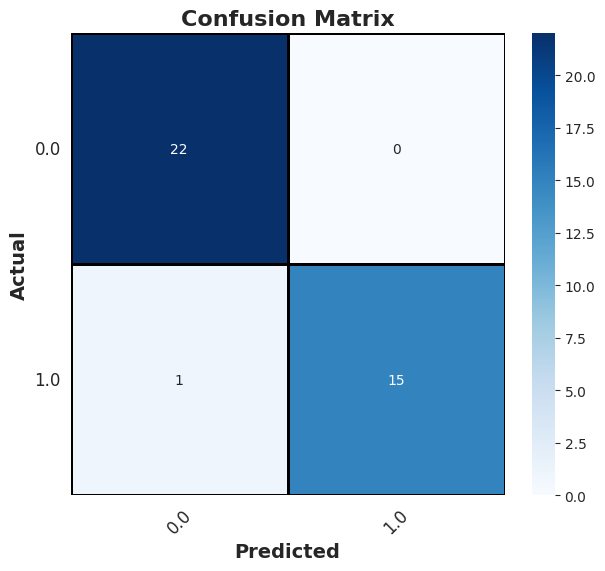

In [ ]:

from sklearn.metrics import confusion_matrix # Import confusion_matrix

plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black') # Use y_pred instead of rf_predictions
plt.xticks(ticks=np.arange(len(np.unique(y))) + 0.5, labels=np.unique(y), fontsize=12, rotation=45)
plt.yticks(ticks=np.arange(len(np.unique(y))) + 0.5, labels=np.unique(y), fontsize=12, rotation=0)
plt.xlabel("Predicted", fontsize=14, fontweight='bold')
plt.ylabel("Actual", fontsize=14, fontweight='bold')
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

In [ ]:
print(df.iloc[:, -1].value_counts())  # Check if the target variable is imbalanced


extcGvHD_b'?'
False    156
True      31
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9210526315789473
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        22
         1.0       0.88      0.94      0.91        16

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



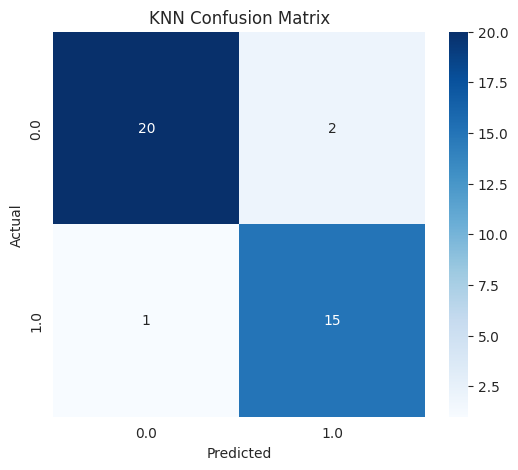

In [ ]:
# Compute confusion matrix for KNN model
knn_cm = confusion_matrix(y_test, knn_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:46:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9473684210526315
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        22
         1.0       0.94      0.94      0.94        16

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



<Axes: >

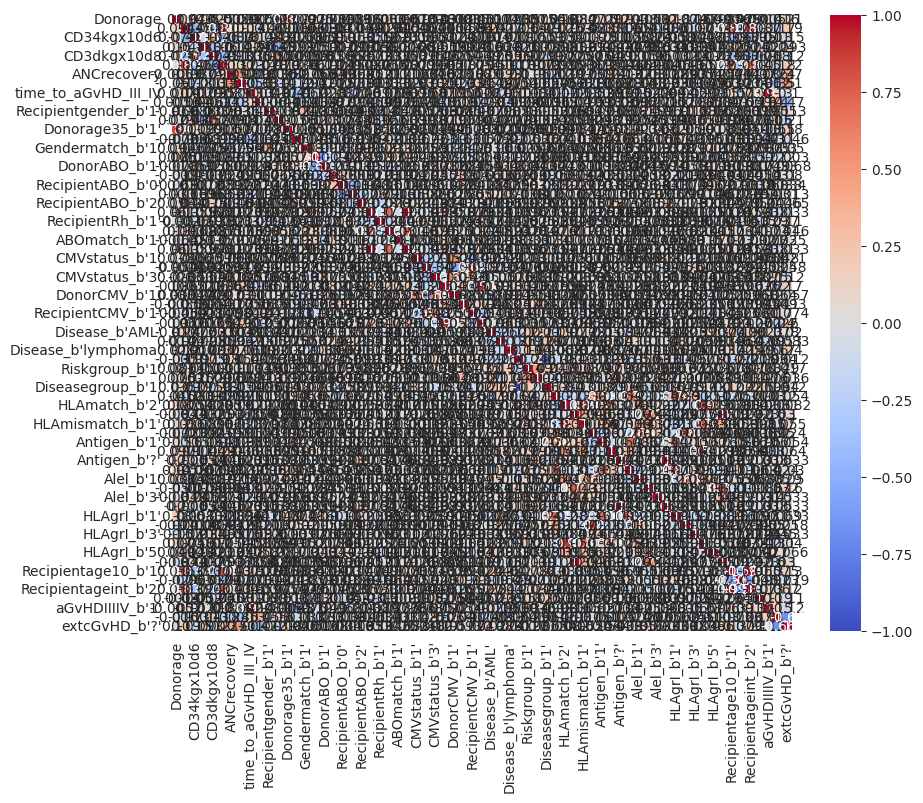

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=3, learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

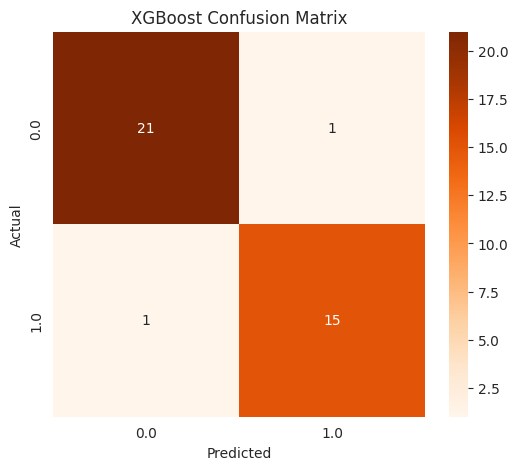

In [ ]:
# Compute confusion matrix for XGBoost model
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix for XGBoost model
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap="Oranges", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


           Model  Accuracy  Precision    Recall  F1-score
0  Random Forest  0.973684   0.974828  0.973684  0.973552
1            KNN  0.921053   0.922895  0.921053  0.921331
2        XGBoost  0.947368   0.947368  0.947368  0.947368


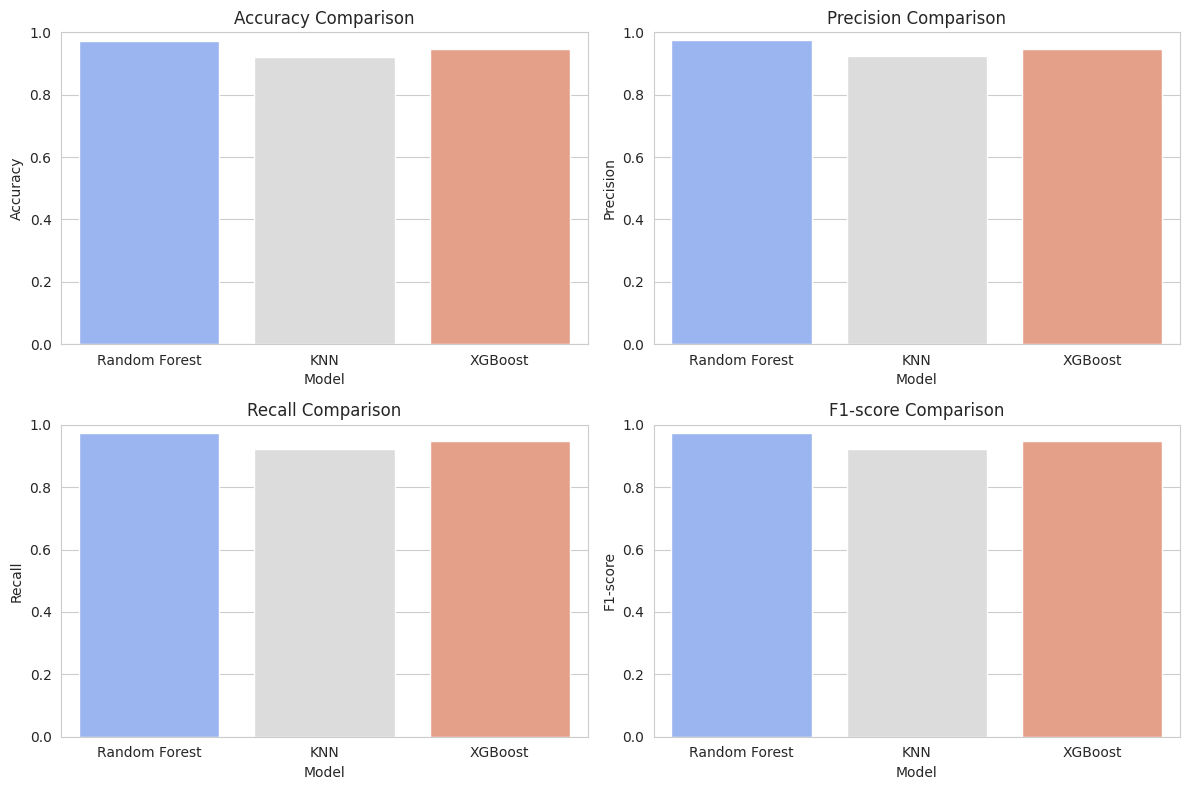

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate models
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return [accuracy, precision, recall, f1]

# Store model results
models = ["Random Forest", "KNN", "XGBoost"]
predictions = [rf_pred, knn_pred, xgb_pred]
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}

for model, pred in zip(models, predictions):
    acc, prec, rec, f1 = evaluate_model(model, y_test, pred)
    results["Model"].append(model)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1-score"].append(f1)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Plot metrics comparison as bar graphs
plt.figure(figsize=(12, 8))
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x="Model", y=metric, data=results_df, palette="coolwarm")
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()
